Predicción del precio de vehículos a partir de sus características principales

La intención de este notebook es analizar un conjunto de datos de automóviles con el objetivo de predecir su precio a partir de diferentes características relevantes. El dataset utilizado contiene información asociada a distintos atributos, como el kilometraje, la marca, el año de registro, el tipo de caja de cambios, el estado del vehículo en cuanto a reparaciones previas y el tipo de combustible, los cuales representan factores comúnmente considerados en el mercado automotor.

En una primera etapa, se realiza un análisis exploratorio de los datos (EDA) con el fin de comprender la distribución de las variables, identificar patrones, detectar valores atípicos y analizar posibles relaciones entre los atributos y el precio. Posteriormente, se entrena un modelo predictivo capaz de estimar el valor de un automóvil a partir de sus características principales.

Los resultados obtenidos permiten comprender cómo ciertos atributos influyen en el valor de mercado de los automóviles, lo que puede servir como apoyo en la toma de decisiones relacionadas con la compra y venta de vehículos.

Hipotesis:

- Existe una relación inversa entre el kilometraje y el precio del vehículo: a menor kilometraje, mayor es el precio del auto.
- El precio promedio de los vehículos varía según la marca del vehículo.
- Los vehículos con un año de registro más reciente tienden a tener un precio mayor.

In [ ]:
pip install pandas numpy matplotlib seaborn

In [26]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [27]:
df = pd.read_csv("1_car_pricing.csv")

In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 371528 entries, 0 to 371527
Data columns (total 21 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   index                371528 non-null  int64 
 1   dateCrawled          371528 non-null  object
 2   name                 371528 non-null  object
 3   seller               371528 non-null  object
 4   offerType            371528 non-null  object
 5   price                371528 non-null  int64 
 6   abtest               371528 non-null  object
 7   vehicleType          333659 non-null  object
 8   yearOfRegistration   371528 non-null  int64 
 9   gearbox              351319 non-null  object
 10  powerPS              371528 non-null  int64 
 11  model                351044 non-null  object
 12  kilometer            371528 non-null  int64 
 13  monthOfRegistration  371528 non-null  int64 
 14  fuelType             338142 non-null  object
 15  brand                371528 non-nu

In [29]:
df.isna().sum()

index                      0
dateCrawled                0
name                       0
seller                     0
offerType                  0
price                      0
abtest                     0
vehicleType            37869
yearOfRegistration         0
gearbox                20209
powerPS                    0
model                  20484
kilometer                  0
monthOfRegistration        0
fuelType               33386
brand                      0
notRepairedDamage      72060
dateCreated                0
nrOfPictures               0
postalCode                 0
lastSeen                   0
dtype: int64

Dado que las variables vehicleType, gearbox, model, fuelType y notRepairedDamage presentan una proporción considerable de valores faltantes, es mejor excluirlas del análisis exploratorio con el fin de evitar sesgos y asegurar la calidad de los resultados.

In [30]:
df_clean = df.copy()

In [31]:
df_clean = df_clean[df_clean['price'] > 0]
df_clean = df_clean[df_clean['price'] <= 100000]

In [32]:
df_clean = df_clean[
    (df_clean['yearOfRegistration'] >= 1950) &
    (df_clean['yearOfRegistration'] <= 2025)
]

In [33]:
df_clean = df_clean[df_clean['kilometer'] > 0]

Se realiza una copia del dataset original denominada df_clean. Posteriormente, se lleva a cabo un proceso de limpieza mediante la eliminación de valores atípicos e inconsistentes en las variables principales del análisis, tales como el precio, el año de registro y el kilometraje. Estos filtros se aplican con el fin de garantizar la coherencia de los datos y asegurar un análisis alineado con las hipótesis planteadas.

In [34]:
cols_to_drop = [
    'index', 'dateCrawled', 'name', 'seller', 'offerType', 'abtest',
    'dateCreated', 'nrOfPictures', 'postalCode', 'lastSeen',
    'monthOfRegistration', 'vehicleType', 'gearbox', 'model',
    'fuelType', 'notRepairedDamage'
]

df_clean.drop(columns=cols_to_drop, inplace=True)


Se eliminan aquellas columnas que no aportan información relevante para el análisis exploratorio ni para la evaluación de las hipótesis planteadas. Esta depuración permite simplificar el dataset, reducir ruido innecesario y enfocar el análisis en las variables directamente relacionadas con el precio del vehículo.

In [35]:
df_clean.shape

(360038, 5)

In [36]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Index: 360038 entries, 0 to 371527
Data columns (total 5 columns):
 #   Column              Non-Null Count   Dtype 
---  ------              --------------   ----- 
 0   price               360038 non-null  int64 
 1   yearOfRegistration  360038 non-null  int64 
 2   powerPS             360038 non-null  int64 
 3   kilometer           360038 non-null  int64 
 4   brand               360038 non-null  object
dtypes: int64(4), object(1)
memory usage: 16.5+ MB


In [37]:
df_clean.describe()

,price,yearOfRegistration,powerPS,kilometer
count,360038.000000,360038.000000,360038.000000,360038.000000
mean,5772.758909,2003.485343,116.315517,125814.455696
std,7541.966209,7.427983,188.502462,39652.219814
min,1.000000,1950.000000,0.000000,5000.000000
25%,1250.000000,1999.000000,72.000000,125000.000000
50%,3000.000000,2004.000000,105.000000,150000.000000
75%,7450.000000,2008.000000,150.000000,150000.000000
max,100000.000000,2019.000000,20000.000000,150000.000000


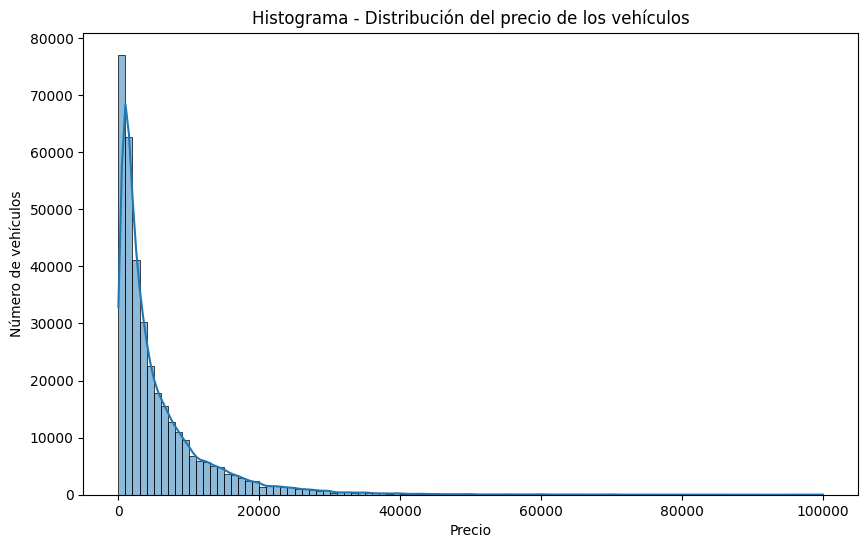

In [51]:
plt.figure(figsize=(10, 6))
sns.histplot(df_clean['price'], bins=100, kde=True)

plt.title('Histograma - Distribución del precio de los vehículos')
plt.xlabel('Precio')
plt.ylabel('Número de vehículos')

plt.show()

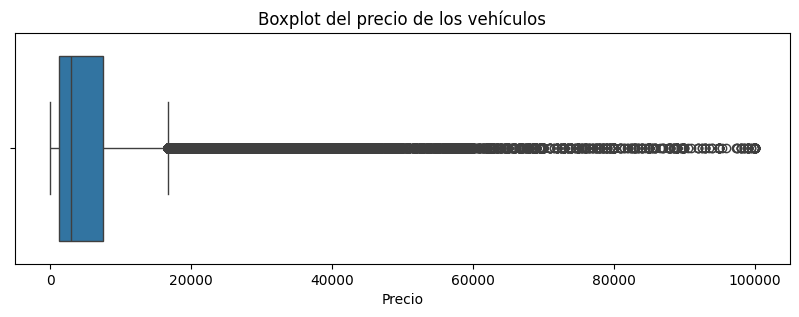

In [52]:
plt.figure(figsize=(10, 3))
sns.boxplot(x=df_clean['price'])

plt.title('Boxplot del precio de los vehículos')
plt.xlabel('Precio')

plt.show()


El histograma y el boxplot muestran que la distribución del precio de los vehículos es asimétrica hacia la derecha, lo que indica que la mayoría de los autos se concentran en rangos de precio bajos, mientras que existe una menor cantidad de vehículos con precios elevados. 

El boxplot confirma este comportamiento, ya que la mediana se encuentra más cercana a los valores bajos y se observan varios valores atípicos en el extremo superior. Estos valores no representan errores, sino vehículos de alto valor o exclusivos.